In [221]:
import pandas as pd
import numpy as np


In [222]:
pre_survey = pd.read_csv('inst/extdata/pre_survey.csv', encoding = 'latin-1')
course_data = pd.read_csv('inst/extdata/course_data.csv', encoding = 'latin-1')
course_minutes = pd.read_csv('inst/extdata/course_minutes.csv', encoding = 'latin-1')
pre_survey

,opdata_username,opdata_CourseID,Q1MaincellgroupRow1,Q1MaincellgroupRow2,Q1MaincellgroupRow3,Q1MaincellgroupRow4,Q1MaincellgroupRow5,Q1MaincellgroupRow6,Q1MaincellgroupRow7,Q1MaincellgroupRow8,Q1MaincellgroupRow9,Q1MaincellgroupRow10
0,_80624_1,FrScA-S116-01,4.0,4.0,4.0,1.0,5.0,4.0,1.0,5.0,5.0,5.0
1,_80623_1,BioA-S116-01,4.0,4.0,3.0,2.0,4.0,4.0,2.0,3.0,4.0,2.0
2,_82588_1,OcnA-S116-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,_80623_1,AnPhA-S116-01,4.0,3.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,4.0
4,_80624_1,AnPhA-S116-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1097,_93993_1,BioA-S216-01,5.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,4.0,5.0
1098,_93993_1,BioA-S216-01,4.0,4.0,4.0,1.0,4.0,5.0,2.0,4.0,3.0,5.0
1099,_93993_1,BioA-S216-01,4.0,3.0,2.0,2.0,4.0,3.0,1.0,4.0,4.0,4.0
1100,_93993_1,BioA-S216-01,4.0,4.0,4.0,2.0,4.0,4.0,2.0,4.0,4.0,4.0


In [223]:
pre_survey.columns = ['student_id','course_id','q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
pre_survey.q4 = 6 - pre_survey.q4
pre_survey.q7 = 6 - pre_survey.q7
pre_survey

,student_id,course_id,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10
0,_80624_1,FrScA-S116-01,4.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0
1,_80623_1,BioA-S116-01,4.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0
2,_82588_1,OcnA-S116-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,_80623_1,AnPhA-S116-01,4.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,4.0
4,_80624_1,AnPhA-S116-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1097,_93993_1,BioA-S216-01,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0
1098,_93993_1,BioA-S216-01,4.0,4.0,4.0,5.0,4.0,5.0,4.0,4.0,3.0,5.0
1099,_93993_1,BioA-S216-01,4.0,3.0,2.0,4.0,4.0,3.0,5.0,4.0,4.0,4.0
1100,_93993_1,BioA-S216-01,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [224]:
pre_survey_long = pre_survey.melt(id_vars = ['student_id','course_id'],
                                 var_name = 'question',
                                 value_name = 'response')
pre_survey_long

,student_id,course_id,question,response
0,_80624_1,FrScA-S116-01,q1,4.0
1,_80623_1,BioA-S116-01,q1,4.0
2,_82588_1,OcnA-S116-03,q1,NaN
3,_80623_1,AnPhA-S116-01,q1,4.0
4,_80624_1,AnPhA-S116-01,q1,NaN
...,...,...,...,...
11015,_93993_1,BioA-S216-01,q10,5.0
11016,_93993_1,BioA-S216-01,q10,5.0
11017,_93993_1,BioA-S216-01,q10,4.0
11018,_93993_1,BioA-S216-01,q10,4.0


In [225]:
ints = ['q1','q4','q5','q8','q10']
uvs = ['q2','q6','q9']
pcs = ['q3','q7']


In [226]:
ints = ['q1','q4','q5','q8','q10']
uvs = ['q2','q6','q9']
pcs = ['q3','q7']
pre_survey_long['measure_mean'] = 'none'
pre_survey_long.loc[pre_survey_long['question'].isin(ints),'measure_mean'] = 'int'
pre_survey_long.loc[pre_survey_long['question'].isin(uvs),'measure_mean'] = 'uv'
pre_survey_long.loc[pre_survey_long['question'].isin(pcs),'measure_mean'] = 'pc'
pre_survey_long.sample(20)

,student_id,course_id,question,response,measure_mean
4627,_70532_1,AnPhA-S116-01,q5,5.0,int
1494,_86275_1,AnPhA-S116-01,q2,4.0,uv
10088,_90397_1,AnPhA-S116-02,q10,NaN,int
4813,_49147_1,BioA-S116-01,q5,NaN,int
702,_94744_1,OcnA-S216-01,q1,5.0,int
7518,_95041_1,AnPhA-S216-02,q7,4.0,pc
8010,_49147_1,BioA-S116-01,q8,4.0,int
1764,_67463_1,FrScA-S216-01,q2,3.0,uv
8728,_93993_1,BioA-S216-01,q8,4.0,int
3183,_86515_1,FrScA-S216-01,q3,4.0,pc


In [227]:
pre_survey_long.iloc[3470]

student_id        @X@user.pk_string@X@
course_id       @X@course.course_id@X@
question                            q4
response                           NaN
measure_mean                       int
Name: 3470, dtype: object

In [228]:
pre_survey_long.measure_mean.unique()
mean_measures = pd.DataFrame()
mean_measures['measures'] = pre_survey_long.measure_mean.unique()
means = []
percent_na = []
for measure in mean_measures['measures']:
    temp_df = pre_survey_long.loc[pre_survey_long['measure_mean'] == measure]
    means.append(temp_df['response'].mean())
    num_na = temp_df['response'].isna().sum()
    percent_na.append(num_na / len(temp_df))
mean_measures['mean_response'] = means
mean_measures['percent_NA'] = percent_na
mean_measures

,measures,mean_response,percent_NA
0,int,4.245637,0.178403
1,uv,3.739146,0.177858
2,pc,3.646247,0.177858


In [229]:
course_data.head()


,CourseSectionOrigID,Bb_UserPK,Gradebook_Item,Grade_Category,FinalGradeCEMS,Points_Possible,Points_Earned,Gender
0,AnPhA-S116-01,60186,POINTS EARNED & TOTAL COURSE POINTS,NaN,86.272,5.0,4.050,F
1,AnPhA-S116-01,60186,WORK ATTEMPTED,NaN,86.272,30.0,24.000,F
2,AnPhA-S116-01,60186,0.1: Message Your Instructor,NaN,86.272,105.0,71.675,F
3,AnPhA-S116-01,60186,0.2: Intro Assignment - Discussion Board,Hw,86.272,140.0,140.970,F
4,AnPhA-S116-01,60186,0.3: Intro Assignment - Submitting Files,Hw,86.272,5.0,5.000,M


In [230]:
new_courseIDs = course_data['CourseSectionOrigID'].str.split("-", expand=True)
new_courseIDs.columns = ['subject','semester','section']
course_data = pd.merge(new_courseIDs, course_data, left_index=True, right_index=True)
course_data

,subject,semester,section,CourseSectionOrigID,Bb_UserPK,Gradebook_Item,Grade_Category,FinalGradeCEMS,Points_Possible,Points_Earned,Gender
0,AnPhA,S116,01,AnPhA-S116-01,60186,POINTS EARNED & TOTAL COURSE POINTS,NaN,86.272000,5.0,4.050,F
1,AnPhA,S116,01,AnPhA-S116-01,60186,WORK ATTEMPTED,NaN,86.272000,30.0,24.000,F
2,AnPhA,S116,01,AnPhA-S116-01,60186,0.1: Message Your Instructor,NaN,86.272000,105.0,71.675,F
3,AnPhA,S116,01,AnPhA-S116-01,60186,0.2: Intro Assignment - Discussion Board,Hw,86.272000,140.0,140.970,F
4,AnPhA,S116,01,AnPhA-S116-01,60186,0.3: Intro Assignment - Submitting Files,Hw,86.272000,5.0,5.000,M
...,...,...,...,...,...,...,...,...,...,...,...
29706,PhysA,T116,01,PhysA-T116-01,84632,6.2 Lab Activity - Energy Conversion,Hw,97.638889,25.0,NaN,F
29707,PhysA,T116,01,PhysA-T116-01,84632,6.3 Lab Activity - Specific Heat,Hw,97.638889,10.0,8.000,M
29708,PhysA,T116,01,PhysA-T116-01,84632,6.4 Joulies and Phase Changes,Hw,97.638889,5.0,NaN,M
29709,PhysA,T116,01,PhysA-T116-01,84632,6.5 Quiz,Qz,97.638889,10.0,10.000,F


In [231]:
pre_survey['student_id'] = pre_survey['student_id'].str.slice(start=1, stop=6)

In [232]:
course_data = course_data.rename(columns = {'Bb_UserPK':'student_id',
                                            'CourseSectionOrigID':'course_id'})
course_data['student_id'] = course_data['student_id'].astype('str')
course_data

,subject,semester,section,course_id,student_id,Gradebook_Item,Grade_Category,FinalGradeCEMS,Points_Possible,Points_Earned,Gender
0,AnPhA,S116,01,AnPhA-S116-01,60186,POINTS EARNED & TOTAL COURSE POINTS,NaN,86.272000,5.0,4.050,F
1,AnPhA,S116,01,AnPhA-S116-01,60186,WORK ATTEMPTED,NaN,86.272000,30.0,24.000,F
2,AnPhA,S116,01,AnPhA-S116-01,60186,0.1: Message Your Instructor,NaN,86.272000,105.0,71.675,F
3,AnPhA,S116,01,AnPhA-S116-01,60186,0.2: Intro Assignment - Discussion Board,Hw,86.272000,140.0,140.970,F
4,AnPhA,S116,01,AnPhA-S116-01,60186,0.3: Intro Assignment - Submitting Files,Hw,86.272000,5.0,5.000,M
...,...,...,...,...,...,...,...,...,...,...,...
29706,PhysA,T116,01,PhysA-T116-01,84632,6.2 Lab Activity - Energy Conversion,Hw,97.638889,25.0,NaN,F
29707,PhysA,T116,01,PhysA-T116-01,84632,6.3 Lab Activity - Specific Heat,Hw,97.638889,10.0,8.000,M
29708,PhysA,T116,01,PhysA-T116-01,84632,6.4 Joulies and Phase Changes,Hw,97.638889,5.0,NaN,M
29709,PhysA,T116,01,PhysA-T116-01,84632,6.5 Quiz,Qz,97.638889,10.0,10.000,F


In [233]:
pre_survey

,student_id,course_id,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10
0,80624,FrScA-S116-01,4.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0
1,80623,BioA-S116-01,4.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0
2,82588,OcnA-S116-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,80623,AnPhA-S116-01,4.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,4.0
4,80624,AnPhA-S116-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1097,93993,BioA-S216-01,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0
1098,93993,BioA-S216-01,4.0,4.0,4.0,5.0,4.0,5.0,4.0,4.0,3.0,5.0
1099,93993,BioA-S216-01,4.0,3.0,2.0,4.0,4.0,3.0,5.0,4.0,4.0,4.0
1100,93993,BioA-S216-01,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [234]:
dat = pd.merge(course_data, pre_survey, how = 'left', on = ['student_id', 'course_id'])
dat

,subject,semester,section,course_id,student_id,Gradebook_Item,Grade_Category,FinalGradeCEMS,Points_Possible,Points_Earned,...,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10
0,AnPhA,S116,01,AnPhA-S116-01,60186,POINTS EARNED & TOTAL COURSE POINTS,NaN,86.272000,5.0,4.050,...,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,AnPhA,S116,01,AnPhA-S116-01,60186,WORK ATTEMPTED,NaN,86.272000,30.0,24.000,...,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,AnPhA,S116,01,AnPhA-S116-01,60186,0.1: Message Your Instructor,NaN,86.272000,105.0,71.675,...,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,AnPhA,S116,01,AnPhA-S116-01,60186,0.2: Intro Assignment - Discussion Board,Hw,86.272000,140.0,140.970,...,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
4,AnPhA,S116,01,AnPhA-S116-01,60186,0.3: Intro Assignment - Submitting Files,Hw,86.272000,5.0,5.000,...,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40343,PhysA,T116,01,PhysA-T116-01,84632,6.2 Lab Activity - Energy Conversion,Hw,97.638889,25.0,NaN,...,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN
40344,PhysA,T116,01,PhysA-T116-01,84632,6.3 Lab Activity - Specific Heat,Hw,97.638889,10.0,8.000,...,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN
40345,PhysA,T116,01,PhysA-T116-01,84632,6.4 Joulies and Phase Changes,Hw,97.638889,5.0,NaN,...,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN
40346,PhysA,T116,01,PhysA-T116-01,84632,6.5 Quiz,Qz,97.638889,10.0,10.000,...,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN


In [235]:
semi_table = course_data.merge(pre_survey, on = ['course_id','student_id'])
semi_table

,subject,semester,section,course_id,student_id,Gradebook_Item,Grade_Category,FinalGradeCEMS,Points_Possible,Points_Earned,...,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10
0,AnPhA,S116,01,AnPhA-S116-01,60186,POINTS EARNED & TOTAL COURSE POINTS,NaN,86.272000,5.0,4.050,...,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,AnPhA,S116,01,AnPhA-S116-01,60186,WORK ATTEMPTED,NaN,86.272000,30.0,24.000,...,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,AnPhA,S116,01,AnPhA-S116-01,60186,0.1: Message Your Instructor,NaN,86.272000,105.0,71.675,...,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,AnPhA,S116,01,AnPhA-S116-01,60186,0.2: Intro Assignment - Discussion Board,Hw,86.272000,140.0,140.970,...,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
4,AnPhA,S116,01,AnPhA-S116-01,60186,0.3: Intro Assignment - Submitting Files,Hw,86.272000,5.0,5.000,...,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39287,PhysA,T116,01,PhysA-T116-01,84632,6.2 Lab Activity - Energy Conversion,Hw,97.638889,25.0,NaN,...,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN
39288,PhysA,T116,01,PhysA-T116-01,84632,6.3 Lab Activity - Specific Heat,Hw,97.638889,10.0,8.000,...,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN
39289,PhysA,T116,01,PhysA-T116-01,84632,6.4 Joulies and Phase Changes,Hw,97.638889,5.0,NaN,...,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN
39290,PhysA,T116,01,PhysA-T116-01,84632,6.5 Quiz,Qz,97.638889,10.0,10.000,...,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN


In [236]:
semi_ind = semi_table['course_id'] + semi_table['student_id']
course_ind = course_data['course_id'] + course_data['student_id']
both_in = course_ind.isin(semi_ind)
dat_semi = course_data[both_in]
dat_semi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28655 entries, 0 to 29710
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject          28655 non-null  object 
 1   semester         28655 non-null  object 
 2   section          28655 non-null  object 
 3   course_id        28655 non-null  object 
 4   student_id       28655 non-null  object 
 5   Gradebook_Item   28655 non-null  object 
 6   Grade_Category   23896 non-null  object 
 7   FinalGradeCEMS   27569 non-null  float64
 8   Points_Possible  28649 non-null  float64
 9   Points_Earned    25015 non-null  float64
 10  Gender           28655 non-null  object 
dtypes: float64(3), object(8)
memory usage: 2.6+ MB


In [237]:
dat_anti = course_data[-both_in]
dat_anti

,subject,semester,section,course_id,student_id,Gradebook_Item,Grade_Category,FinalGradeCEMS,Points_Possible,Points_Earned,Gender
530,AnPhA,S116,01,AnPhA-S116-01,85865,POINTS EARNED & TOTAL COURSE POINTS,NaN,52.171200,460.0,452.0,F
531,AnPhA,S116,01,AnPhA-S116-01,85865,WORK ATTEMPTED,NaN,52.171200,10.0,7.0,F
532,AnPhA,S116,01,AnPhA-S116-01,85865,0.1: Message Your Instructor,NaN,52.171200,10.0,10.0,F
533,AnPhA,S116,01,AnPhA-S116-01,85865,0.2: Intro Assignment - Discussion Board,Hw,52.171200,249.0,216.0,M
534,AnPhA,S116,01,AnPhA-S116-01,85865,0.3: Intro Assignment - Submitting Files,Hw,52.171200,5.0,5.0,F
...,...,...,...,...,...,...,...,...,...,...,...
29663,PhysA,T116,01,PhysA-T116-01,66508,6.2 Lab Activity - Energy Conversion,Hw,93.888889,10.0,9.0,M
29664,PhysA,T116,01,PhysA-T116-01,66508,6.3 Lab Activity - Specific Heat,Hw,93.888889,5.0,5.0,M
29665,PhysA,T116,01,PhysA-T116-01,66508,6.4 Joulies and Phase Changes,Hw,93.888889,345.0,313.0,M
29666,PhysA,T116,01,PhysA-T116-01,66508,6.5 Quiz,Qz,93.888889,10.0,10.0,M


In [238]:
course_minutes = course_minutes.rename(columns={'Bb_UserPK':'student_id','CourseSectionOrigID':'course_id'})
course_minutes.student_id = course_minutes.student_id.astype(int)
dat.student_id = dat.student_id.astype(int)
dat = dat.merge(course_minutes, how='left')
dat = dat.drop_duplicates(subset=(['course_id','student_id']))
dat = dat.rename(columns={'FinalGradeCEMS':'final_grade'})

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='TimeSpent', ylabel='final_grade'>

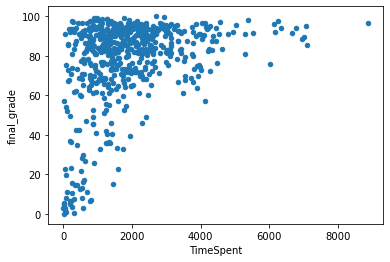

In [244]:
dat.plot(x='TimeSpent', y='final_grade', kind='scatter')

<AxesSubplot:xlabel='TimeSpent', ylabel='final_grade'>

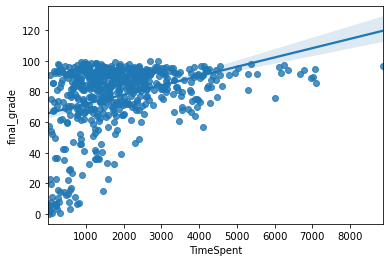

In [245]:
sns.regplot(data=dat, x='TimeSpent', y='final_grade')

In [252]:
ExcelGradeBook = pd.read_excel('data/ExcelGradeBook.xlsx', 
                               sheet_name='Data Entry',
                              header=1,
                              skiprows=9)
gradebook = ExcelGradeBook.copy()

In [256]:
gradebook.columns = [x.lower().replace(' ','_') for x in gradebook.columns]
gradebook.head()


,class,name,race,gender,age,repeated_grades,financial_status,absent,late,make_your_own_categories,...,summative_assessment_1,classwork_16,homework_12,classwork_17,homework_13,project_8,project_9,project_10,summative_assessment_2,assessment_|_insert_new_columns_before_here
0,1.0,Student 1,NaN,NaN,NaN,NaN,NaN,1,0,NaN,...,50.0,15.0,10.0,15.0,5.0,10.0,10.0,10.0,30.0,NaN
1,1.0,Student 2,NaN,NaN,NaN,NaN,NaN,0,1,NaN,...,40.0,15.0,9.0,13.0,3.0,9.0,7.0,10.0,22.0,NaN
2,1.0,Student 3,NaN,NaN,NaN,NaN,NaN,2,0,NaN,...,40.0,15.0,10.0,15.0,3.0,9.0,7.0,9.0,30.0,NaN
3,1.0,Student 4,NaN,NaN,NaN,NaN,NaN,0,0,NaN,...,40.0,13.0,9.0,8.0,3.0,9.0,8.0,8.0,24.0,NaN
4,1.0,Student 5,NaN,NaN,NaN,NaN,NaN,0,0,NaN,...,50.0,15.0,9.0,2.0,3.0,8.0,8.0,10.0,29.0,NaN


In [264]:
gradebook = gradebook.dropna(axis=1, how='all')
gradebook = gradebook.dropna(axis=0, how='all')
gradebook = gradebook.drop(32)
gradebook = gradebook.drop(columns=['absent','late'])

TypeError: bad operand type for unary -: 'str'